<a href="https://colab.research.google.com/github/IvanovAdrew/python-for-big-data-and-data-science/blob/main/Neuro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

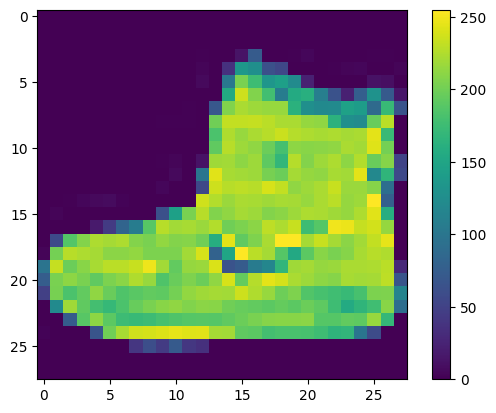

In [4]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)


In [5]:
x_train = x_train / 255
x_test = x_test / 255

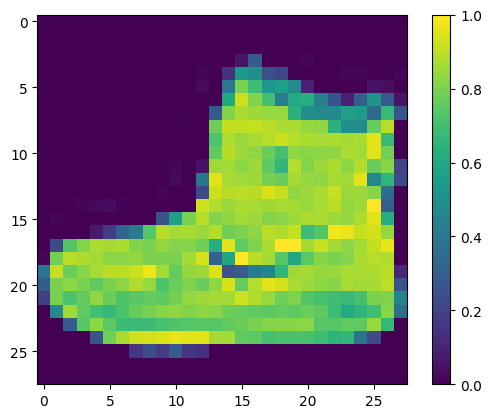

In [6]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

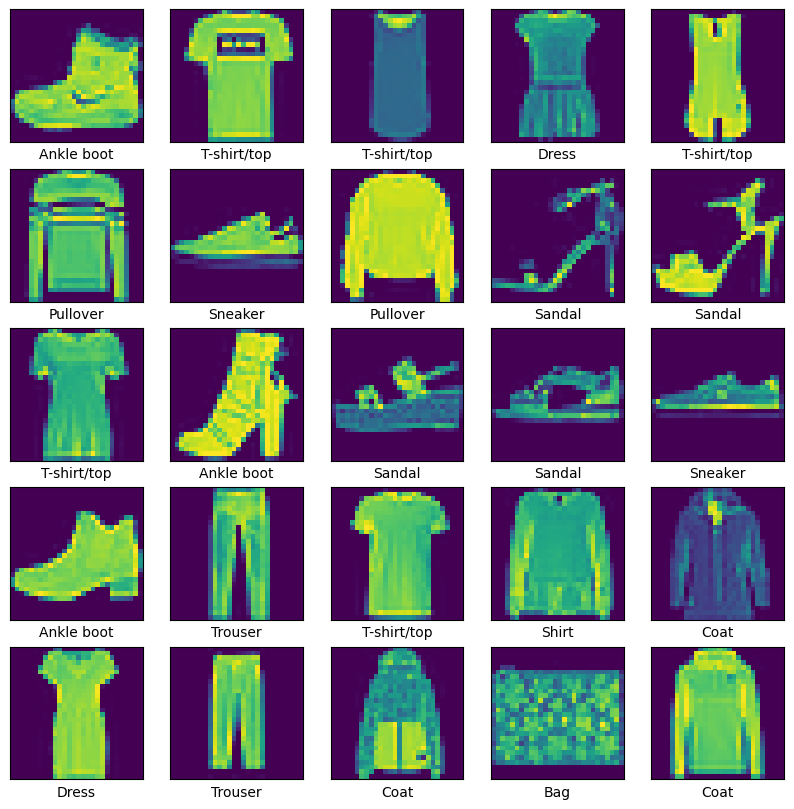

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Компіляція моделі (which translates to "Model Compilation")

model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7403 - accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5159 - accuracy: 0.8246
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4713 - accuracy: 0.8382
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4472 - accuracy: 0.8451
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4281 - accuracy: 0.8519
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4145 - accuracy: 0.8568
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4031 - accuracy: 0.8606
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3937 - accuracy: 0.8628
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3832 - accuracy: 0.8666
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.376

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


313/313 [==============================] - 3s 5ms/step - loss: 0.4151 - accuracy: 0.8541
Test accuracy: 0.8540999889373779


In [13]:
predictions = model.predict(x_train)

1875/1875 [==============================] - 3s 1ms/step


In [15]:
predictions[0]

array([1.1524149e-08, 2.8024896e-09, 1.2505641e-09, 2.4392667e-08,
       5.7938001e-09, 1.0291743e-04, 4.8706891e-08, 5.9213064e-04,
       9.5632140e-06, 9.9929535e-01], dtype=float32)

In [16]:
np.argmax(predictions[0])

9

In [17]:
y_train[0]

9

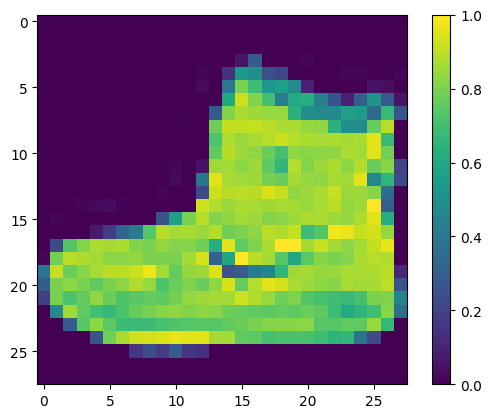

In [18]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

In [19]:
# Function to plot the images in the specified positions in a matrix
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel("{} ({})".format(class_names[predicted_label],
                                class_names[true_label]),
                                color=color)

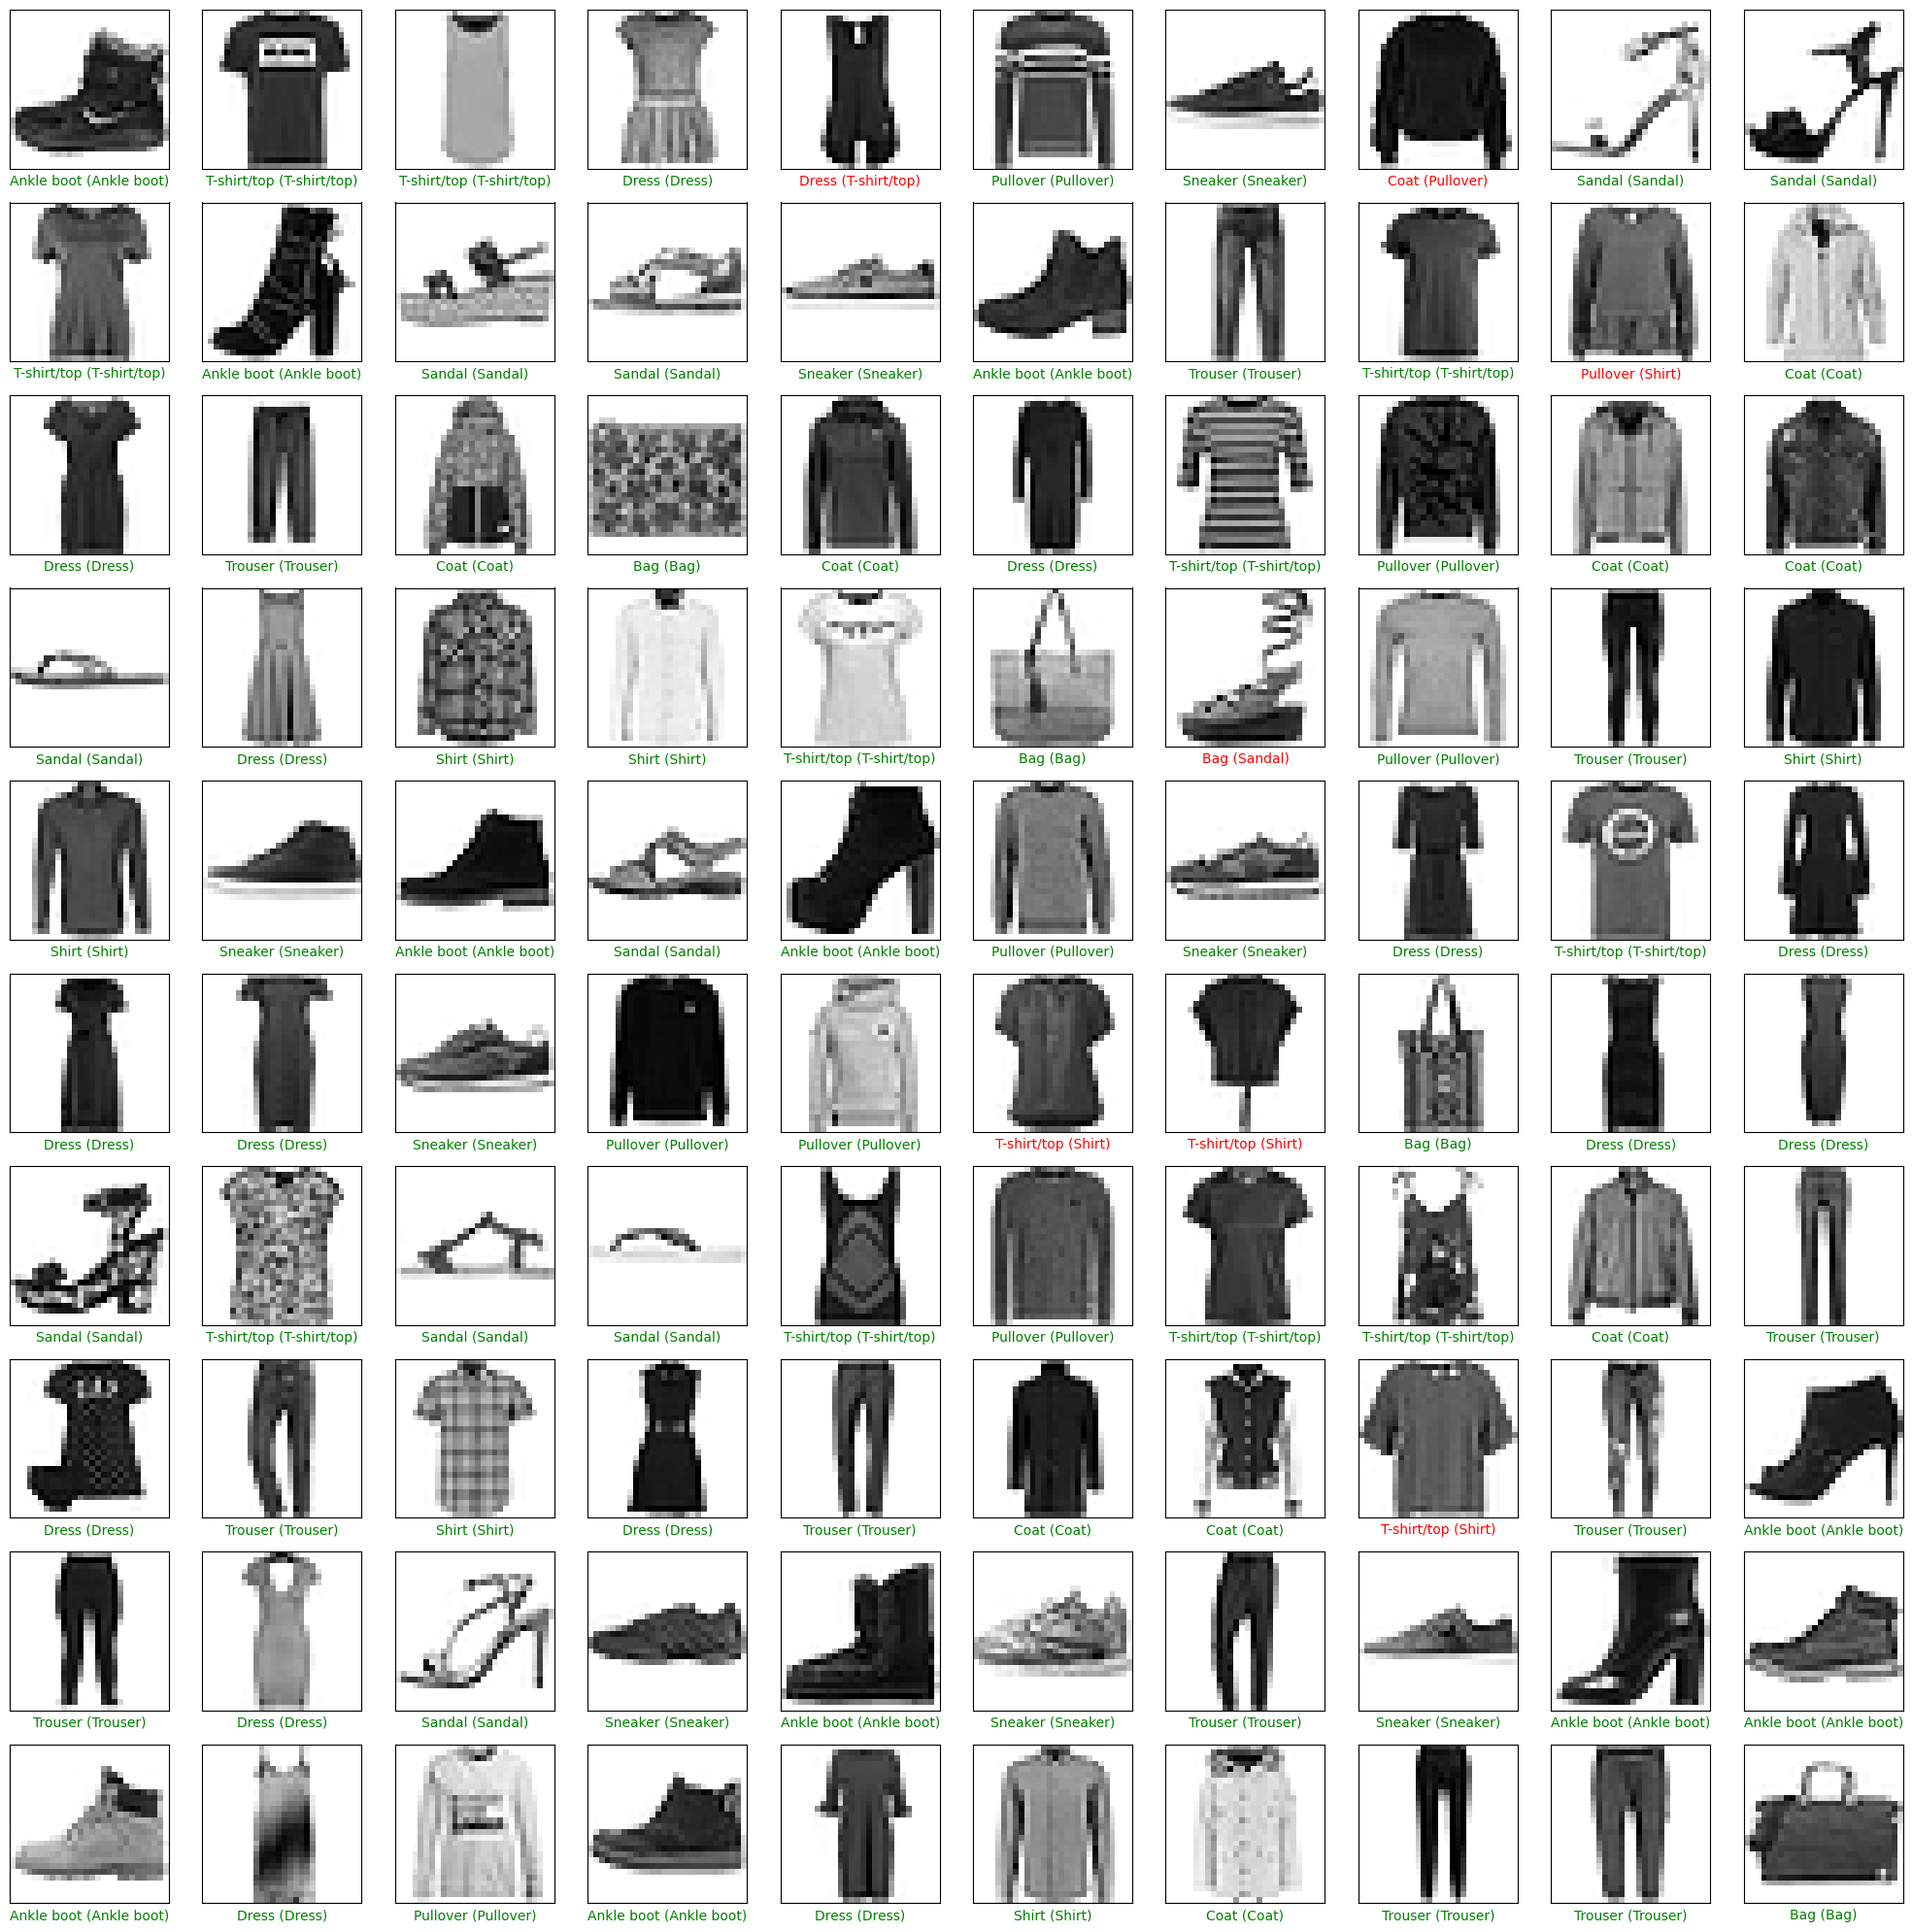

In [20]:
# Display a 10x10 grid of images with predictions
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plot_image(i, predictions[i], y_train, x_train)

plt.tight_layout()
plt.show()